In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, GLMakie, JLD
GLMakie.activate!()

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chem_link, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chem_link * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chem_link * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [129]:
function loop_jac(u, p, t)
    a, b, c, d, s, xr, r,  I, vs, k1, k2, k  = p
    x1, y1, z1, x2, y2, z2 = u

    J = @SMatrix [-3*a*x1^2+2*b*x1-k1*sigma(x2)-k 1 -1 -k1*(x1-vs)*sigma_deri(x2) + k 0 0;
                -2*d*x1 -1 0 0 0 0;
                r*s 0 -r 0 0 0;
                k-k2*(x2-vs)*sigma_deri(x1) 0  0 -3*a*x2^2+2*b*x2-k*sigma(x1)-k 1 -1;
                0 0 0 -2*d*x2 -1 0;
                0 0 0 r*s 0 -r;]
    return J
end

function sigma_deri(x)
    λ = 10
    θ = -0.25
    return (λ * exp( λ*(x - θ) )) / ( exp( λ*(x - θ) ) + 1 )^2
end

sigma_deri (generic function with 1 method)

In [3]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = 0.000
electrical_link = 0.00

u0 = SA[-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link];
ds = ContinuousDynamicalSystem(HR,  u0, p)

6-dimensional continuous dynamical system
 state:       [-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0, 0.0]

In [20]:
start_value_chemical = 0.050
finish_value_chemical = 0.056
len = 500
range_chemical = range(start_value_chemical, finish_value_chemical, length = len  )

index_fix_var = 2
value_fix_var = 0.0
plane = (index_fix_var, value_fix_var)

transient_step = 5000.0 # WARNING
number_points = 500.0

index_change_param = 10

Δt = 0.01

0.01

In [21]:
i = 1
output1 = produce_orbitdiagram(ds, plane, i, index_change_param, range_chemical;
                              tfinal = number_points, Ttr = transient_step, printparams = true,
                              diffeq = (alg = Vern9(), adaptive = false, dt = Δt), rootkw = (xrtol = 1e-11, atol = 1e-11) 
                                );

parameter = 0.05
parameter = 0.050012024048096196
parameter = 0.05002404809619238
parameter = 0.050036072144288575
parameter = 0.05004809619238477
parameter = 0.05006012024048096
parameter = 0.050072144288577154
parameter = 0.05008416833667335
parameter = 0.05009619238476954
parameter = 0.05010821643286573
parameter = 0.050120240480961926
parameter = 0.05013226452905812
parameter = 0.050144288577154306
parameter = 0.0501563126252505
parameter = 0.05016833667334669
parameter = 0.050180360721442885
parameter = 0.05019238476953908
parameter = 0.05020440881763527
parameter = 0.050216432865731464
parameter = 0.05022845691382766
parameter = 0.05024048096192385
parameter = 0.05025250501002004
parameter = 0.05026452905811623
parameter = 0.05027655310621242
parameter = 0.050288577154308615
parameter = 0.05030060120240481
parameter = 0.050312625250501
parameter = 0.050324649298597195
parameter = 0.05033667334669339
parameter = 0.05034869739478958
parameter = 0.050360721442885774
parameter = 0.05

In [22]:
i = 4
output2 = produce_orbitdiagram(ds, plane, i, index_change_param, range_chemical;
                              tfinal = number_points, Ttr = transient_step, printparams = true,
                              diffeq = (alg = Vern9(), adaptive = false, dt = Δt), rootkw = (xrtol = 1e-11, atol = 1e-11)
                                );

parameter = 0.05
parameter = 0.050012024048096196
parameter = 0.05002404809619238
parameter = 0.050036072144288575
parameter = 0.05004809619238477
parameter = 0.05006012024048096
parameter = 0.050072144288577154
parameter = 0.05008416833667335
parameter = 0.05009619238476954
parameter = 0.05010821643286573
parameter = 0.050120240480961926
parameter = 0.05013226452905812
parameter = 0.050144288577154306
parameter = 0.0501563126252505
parameter = 0.05016833667334669
parameter = 0.050180360721442885
parameter = 0.05019238476953908
parameter = 0.05020440881763527
parameter = 0.050216432865731464
parameter = 0.05022845691382766
parameter = 0.05024048096192385
parameter = 0.05025250501002004
parameter = 0.05026452905811623
parameter = 0.05027655310621242
parameter = 0.050288577154308615
parameter = 0.05030060120240481
parameter = 0.050312625250501
parameter = 0.050324649298597195
parameter = 0.05033667334669339
parameter = 0.05034869739478958
parameter = 0.050360721442885774
parameter = 0.05

In [23]:
output_summ = output1 + output2;

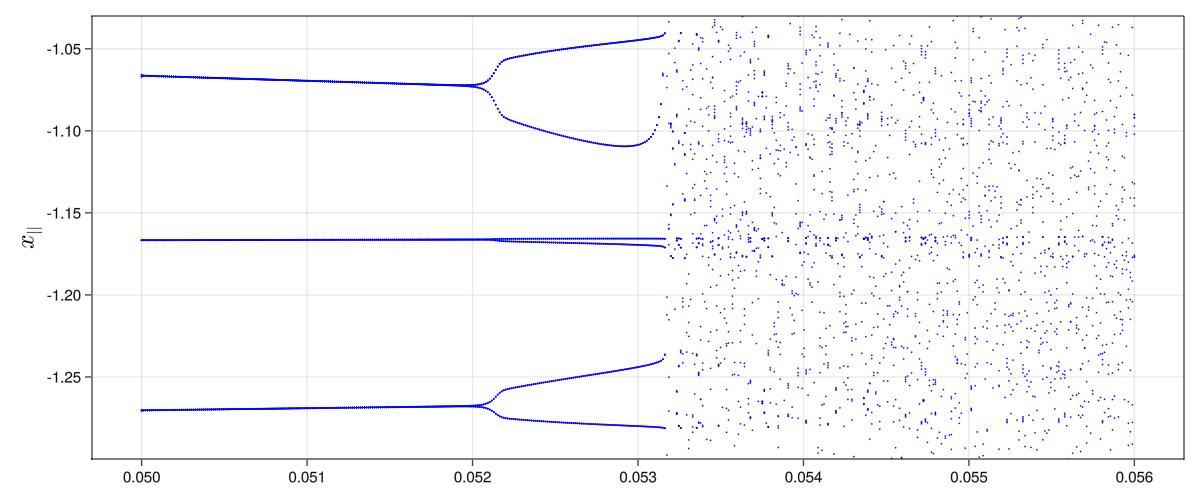

: 

In [29]:
ticks = range(start_value_chemical, finish_value_chemical, step = 0.001)
lab_size = 25; tick_size = 15

fig = Figure(resolution = (1200, 500))

axis = Axis(fig[1,1];
            ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chemical)
    scatter!(axis, fill(p, length(output_summ[j])), output_summ[j]; color = ("blue", 1.0), markersize = 1.5)
end
ylims!(axis, -1.3, -1.03)
fig

In [75]:
path = "C:\\Users\\Alex\\Desktop\\saved_files\\el_link_0.01\\"
cd(path)
directory = "from 0.01 to 0.025"
path = path * directory
cd(path)

In [76]:
save("output1.jld", "data", output1)
save("output2.jld", "data", output2)
save("output_summ.jld", "data", output_summ)

### without electrical link

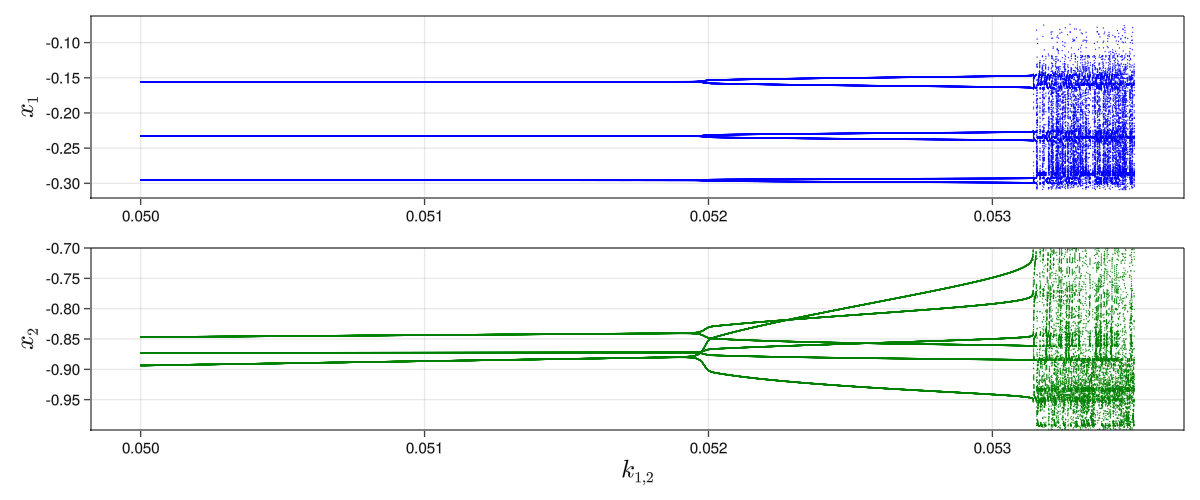

In [159]:
ticks = range(0.05, 0.054, step = 0.001)
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax1 = Axis(fig[1,1], ylabel = L"x_{1}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax2 = Axis(fig[2,1]; xlabel = L"k_{1,2}", ylabel = L"x_{2}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax2.xticks = ticks
for (j, p) in enumerate(range_chemical)
    scatter!(ax1, fill(p, length(output1[j])), output1[j]; color = ("blue", 1.0), markersize = 1.0)
    scatter!(ax2, fill(p, length(output2[j])), output2[j]; color = ("green", 1.0), markersize = 1.0)
end
ylims!(ax2, -0.3, -0.1)
ylims!(ax2, -1.0, -0.7)
fig

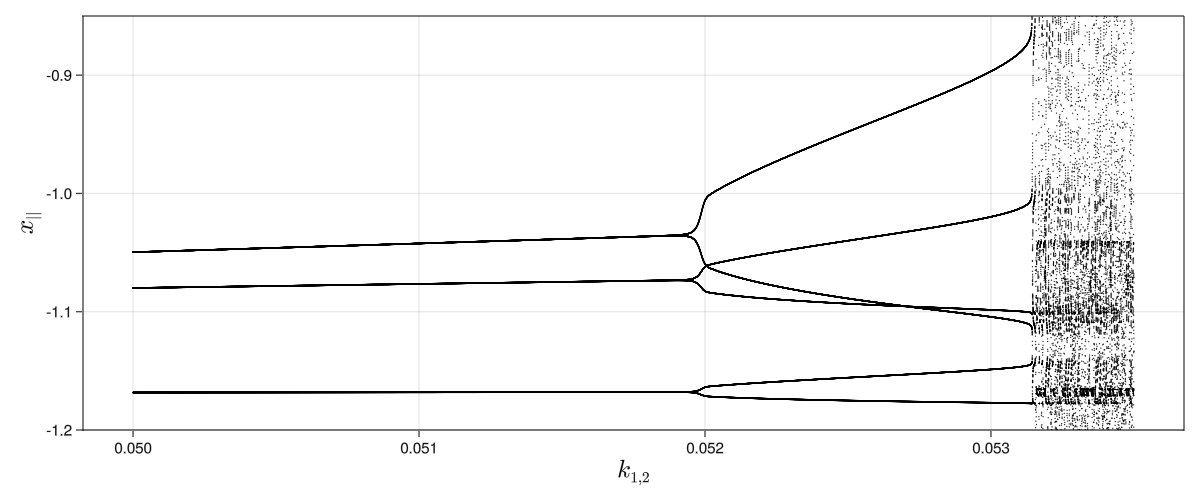

In [163]:
ticks = range(0.05, 0.054, step = 0.001)
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax.xticks = ticks
ylims!(ax, -1.2, -0.85)
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j]; color = ("black", 1.0), markersize = 1.0)
end
fig

### Electrical link 0.01

Начальные условия

[-0.8101352766372285, -2.7584930764592737, 3.815762480694879, 1.7869329149185076, -3.9344739969887303, 3.774018371902089]

##### Диапазон химических связей как в статье

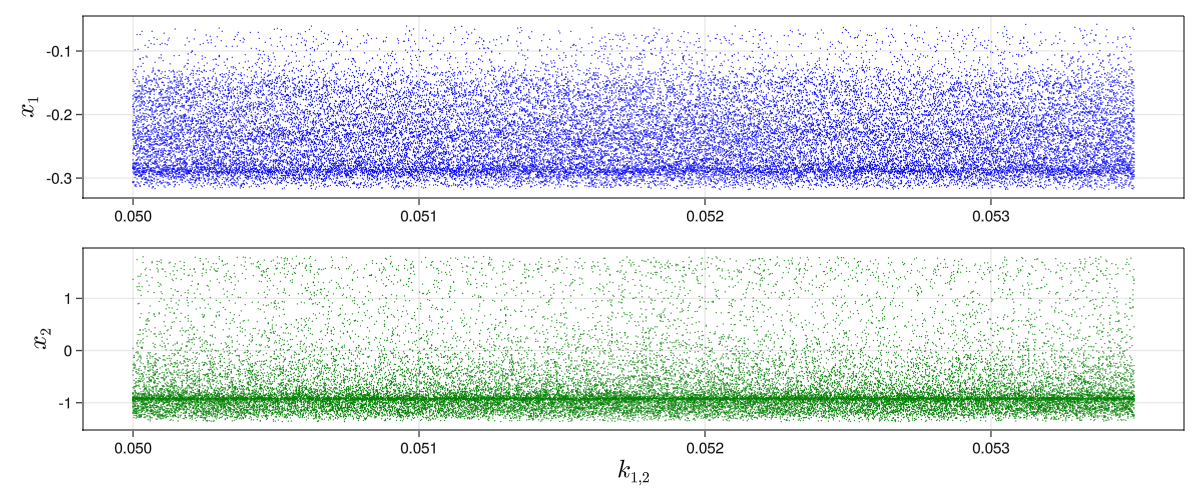

In [189]:
ticks = range(0.05, 0.054, step = 0.001)
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax1 = Axis(fig[1,1], ylabel = L"x_{1}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax2 = Axis(fig[2,1]; xlabel = L"k_{1,2}", ylabel = L"x_{2}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax2.xticks = ticks
for (j, p) in enumerate(range_chemical)
    scatter!(ax1, fill(p, length(output_range_article_1[j])), output_range_article_1[j]; color = ("blue", 1.0), markersize = 1.0)
end
for (j, p) in enumerate(range_chemical)
    scatter!(ax2, fill(p, length(output_range_article_2[j])), output_range_article_2[j]; color = ("green", 1.0), markersize = 1.0)
end

fig

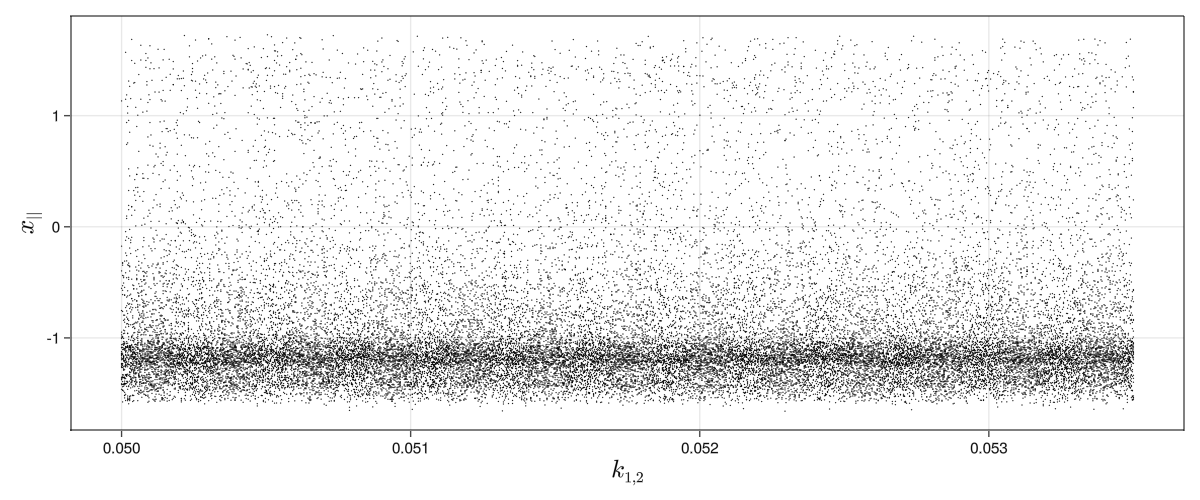

In [190]:
ticks = range(0.05, 0.054, step = 0.001)
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax.xticks = ticks

for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_range_article_sum[j])), output_range_article_sum[j]; color = ("black", 1.0), markersize = 1.0)
end
fig

##### Диапазон химических связей [0; 0.0535]

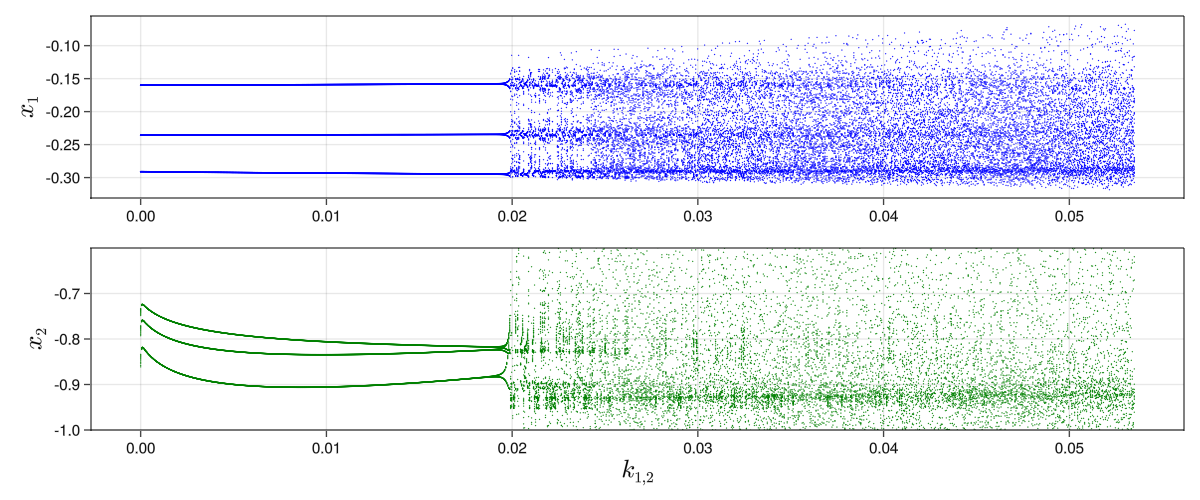

In [22]:
ticks = range(0.00, 0.0535, step = 0.01)
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax1 = Axis(fig[1,1], ylabel = L"x_{1}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax2 = Axis(fig[2,1]; xlabel = L"k_{1,2}", ylabel = L"x_{2}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax2.xticks = ticks
for (j, p) in enumerate(range_chemical)
    scatter!(ax1, fill(p, length(output1[j])), output1[j]; color = ("blue", 1.0), markersize = 1.0)
end
for (j, p) in enumerate(range_chemical)
    scatter!(ax2, fill(p, length(output2[j])), output2[j]; color = ("green", 1.0), markersize = 1.0)
end
ylims!(ax2, [-1.0, -0.6])
ax1.xticks = ticks
ax2.xticks = ticks
fig

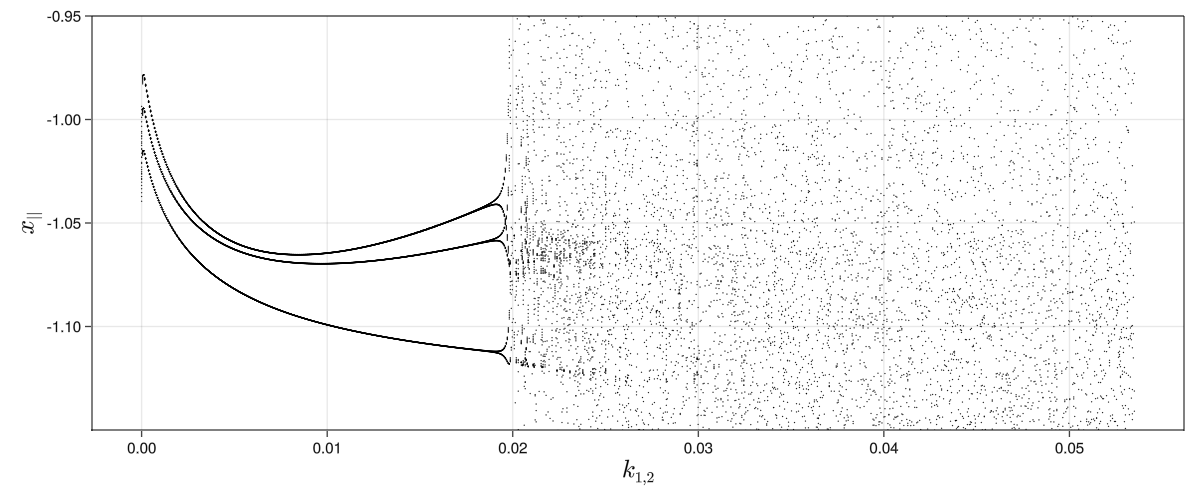

In [23]:
ticks = range(0.00, 0.0535, step = 0.01)
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax.xticks = ticks

for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j]; color = ("black", 1.0), markersize = 1.0)
end
ylims!(ax, [-1.15, -0.95])
fig

##### Диапазон химических связей [0.01, 0.025]

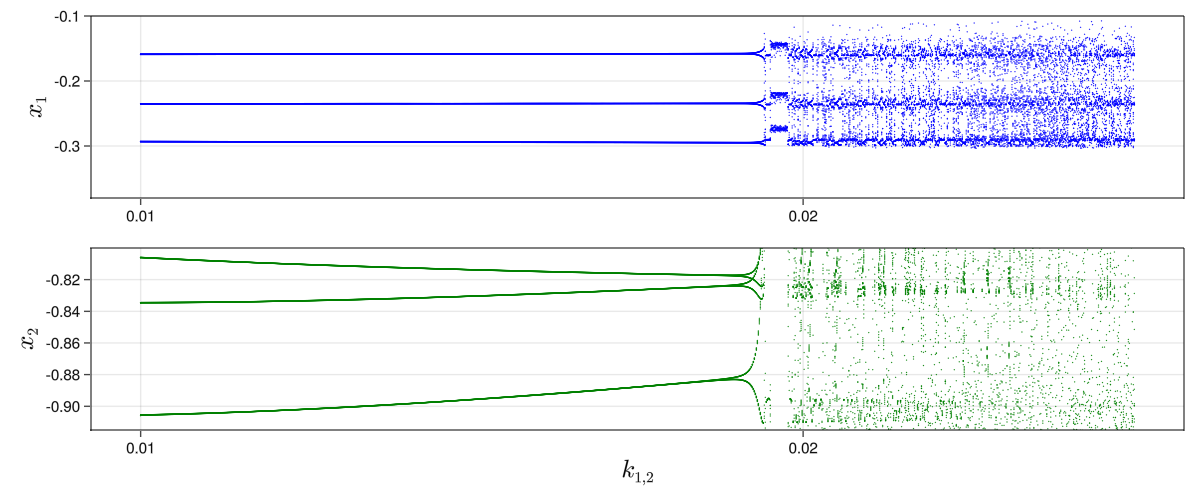

In [46]:
ticks = range(0.01, 0.025, step = 0.01)
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax1 = Axis(fig[1,1], ylabel = L"x_{1}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax2 = Axis(fig[2,1]; xlabel = L"k_{1,2}", ylabel = L"x_{2}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax2.xticks = ticks
for (j, p) in enumerate(range_chemical)
    scatter!(ax1, fill(p, length(output1[j])), output1[j]; color = ("blue", 1.0), markersize = 1.0)
end
for (j, p) in enumerate(range_chemical)
    scatter!(ax2, fill(p, length(output2[j])), output2[j]; color = ("green", 1.0), markersize = 1.0)
end
ylims!(ax1, [-0.38, -0.10])
ylims!(ax2, [-0.915, -0.8])
ax1.xticks = ticks
ax2.xticks = ticks
fig

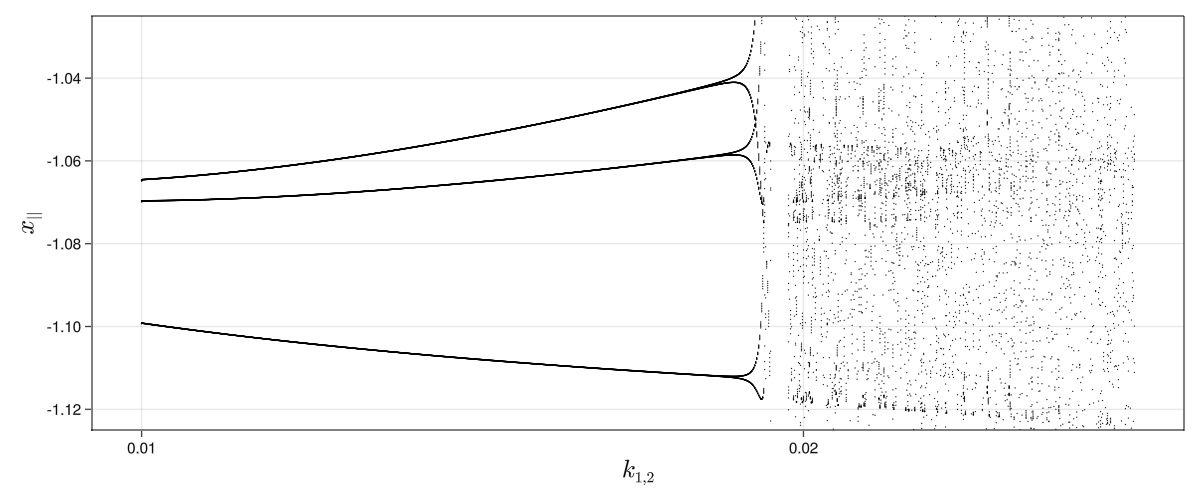

In [44]:
ticks = range(0.01, 0.025, step = 0.01)
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax.xticks = ticks

for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j]; color = ("black", 1.0), markersize = 1.0)
end
ylims!(ax, [-1.125, -1.025])
fig

##### Диапазон химических связей [0.015; 0.2]

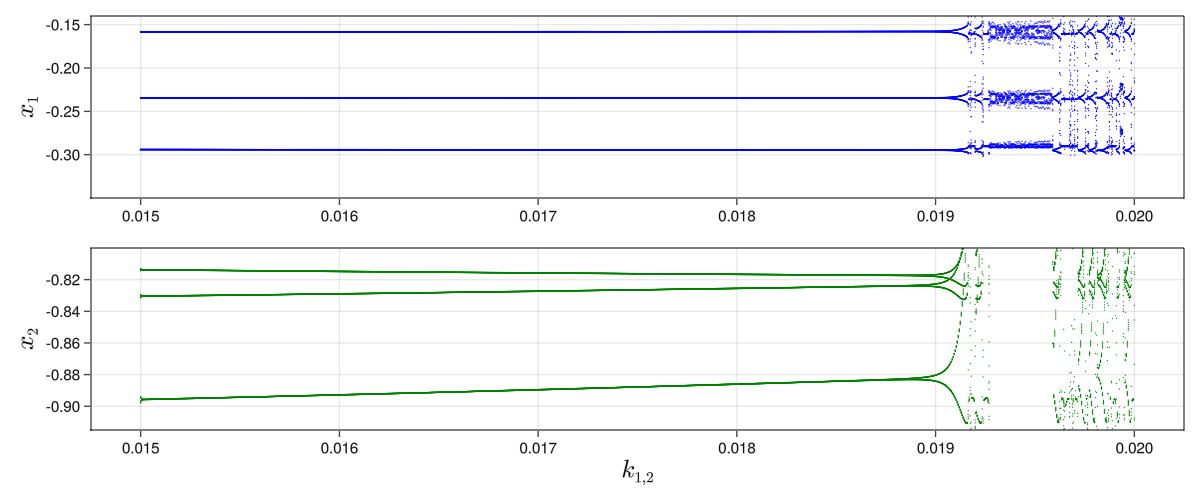

In [71]:
ticks = range(0.015, 0.02, step = 0.001)
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax1 = Axis(fig[1,1], ylabel = L"x_{1}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax2 = Axis(fig[2,1]; xlabel = L"k_{1,2}", ylabel = L"x_{2}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax2.xticks = ticks
for (j, p) in enumerate(range_chemical)
    scatter!(ax1, fill(p, length(output1[j])), output1[j]; color = ("blue", 1.0), markersize = 1.0)
end
for (j, p) in enumerate(range_chemical)
    scatter!(ax2, fill(p, length(output2[j])), output2[j]; color = ("green", 1.0), markersize = 1.0)
end

ylims!(ax1, [-0.35, -0.14])
ylims!(ax2, [-0.915, -0.8])

ax1.xticks = ticks
ax2.xticks = ticks
fig

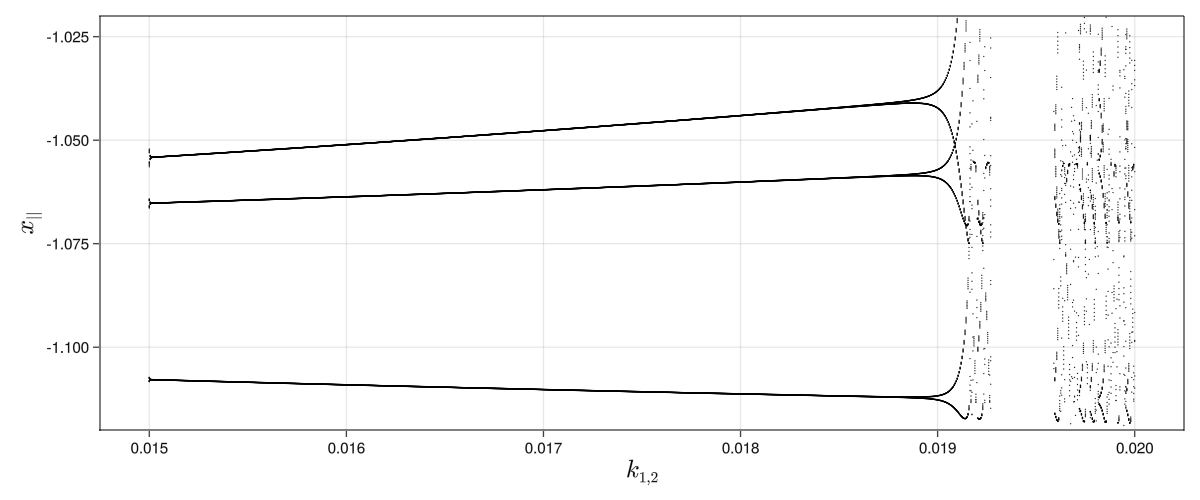

In [78]:
ticks = range(0.015, 0.02, step = 0.001)
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
ax.xticks = ticks

for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j]; color = ("black", 1.0), markersize = 1.0)
end
ylims!(ax, [-1.12, -1.02])
fig

##### Диапазон электрической силы связи [0.01; 0.015]
##### Сечение Пуанкаре 0.0

Начальные условия SA[-1.22295, -6.35756, 3.96711, -1.20323, -6.10152, 3.99382]

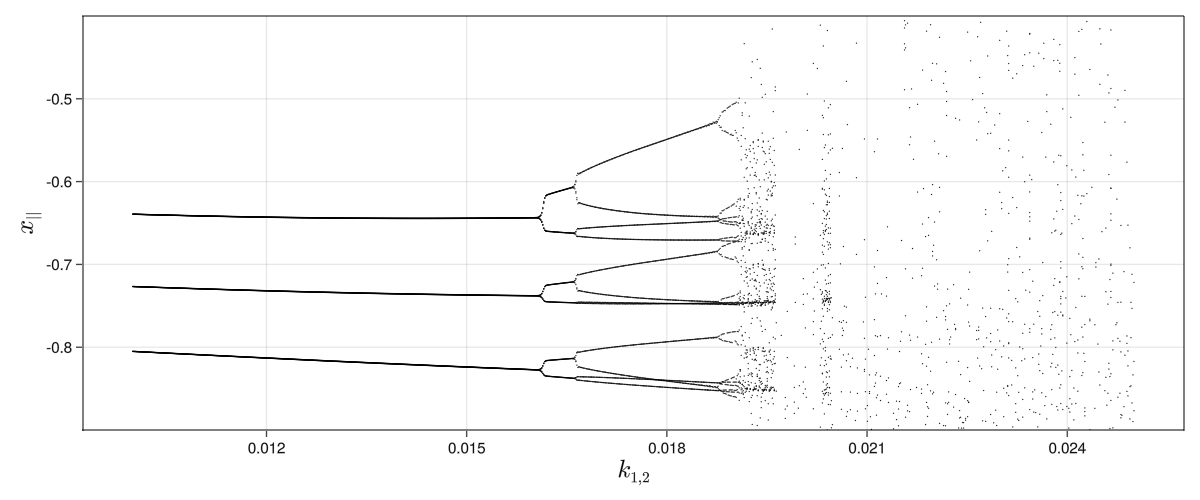

In [57]:
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j]; color = ("black", 1.0), markersize = 1.0)
end
ylims!(-0.9, -0.4)
fig

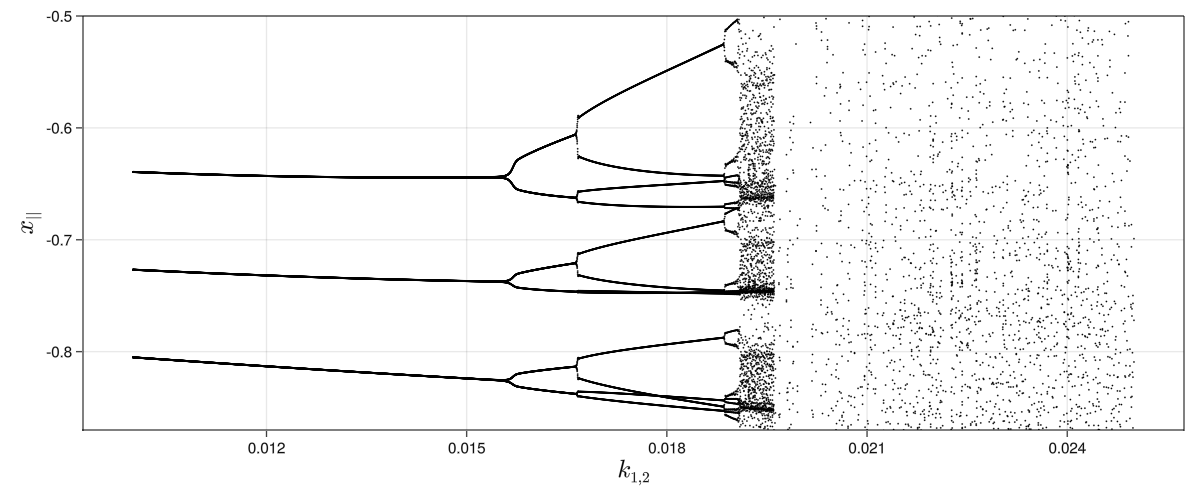

In [81]:
# Ttr = 200 WARNING
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j]; color = ("black", 1.0), markersize = 1.5)
end
ylims!(-0.87, -0.5)
fig

### Electrical link 0.02

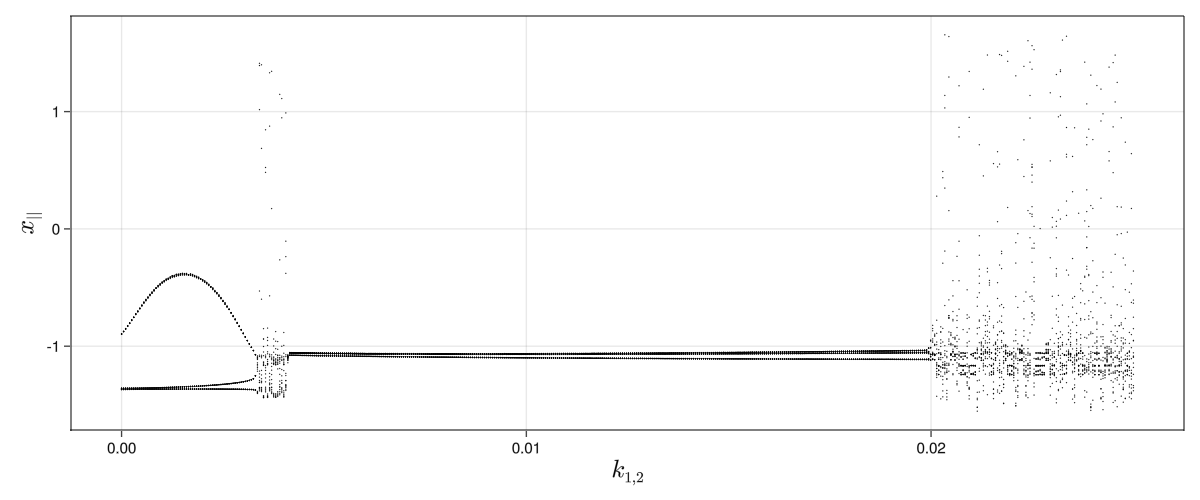

In [215]:
lab_size = 25; tick_size = 15
fig = Figure(resolution = (1200, 500))
ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
            xlabelsize = lab_size, ylabelsize = lab_size,
            xticklabelsize = tick_size, yticklabelsize = tick_size  )
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j]; color = ("black", 1.0), markersize = 1.0)
end
fig